# Import all Important Packages

# Variables There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars.

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000's dollars

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Data collection

In [3]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading Boston Housing Dataset
boston_data = pd.read_csv('housing.csv', delimiter=r"\s+", names = columns)
# Top 5 rows of the boston dataset
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

# Step 2 - Data wrangling

In [4]:
# Input or independent value
#X = boston_data.iloc[:, :13]
X = boston_data.values
X = X[:, :6]
Y = boston_data.loc[:, 'MEDV'].values
# Output or dependent value
#Y = boston_data["medv"]

# Step 3 - Data Analysis

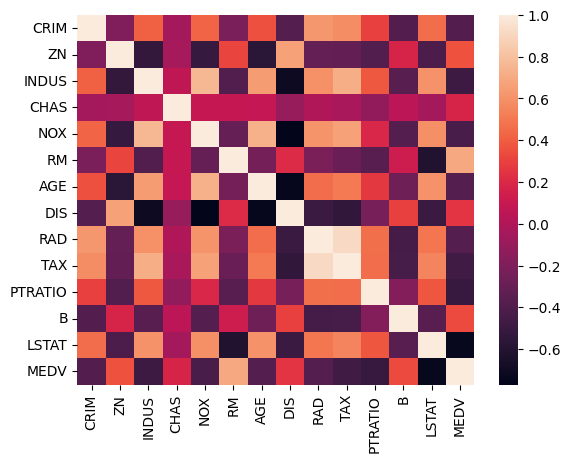

In [5]:
# Find correlation between all available columns
corr = boston_data.corr()
# Find correlated data columns using heatmaps
sns.heatmap(corr)
plt.show()

# Columns which are having correlation +ve and above 0.9 are highly correlated to each other
# We can drop any of them since it will not impact on output

#Right now I am not dropping any column and trying to predict the output with all input data

# Step 4 - Splitting train test data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=10)

# Step 5 - Model Instantiation and training the model

In [7]:
# model instantiation
linear_model = LinearRegression()

# fit the model with input and corresponding output data
linear_model.fit(x_train, y_train)

LinearRegression()

# Step 6 - Testing the model

In [8]:
y_pred = linear_model.predict(x_test)
print("Predicted House Prices")
print(y_pred)

Predicted House Prices
[27.65755392 30.27362068 27.4729386  30.54763336 12.6752239  20.17085347
 28.71419654 15.72694883 25.3796845  35.31443934 21.85636492 30.91004939
 23.08391444 29.08553408 32.49240622 37.8132633  24.27259464 19.39456832
 21.85836201 21.23236647 25.03561847 19.19576487 22.32878247 24.13297238
 31.97838095 20.6361194  22.68810786 18.80703514 37.82962755  5.91777805
 33.27526574 29.32120596 28.87864246 23.14956685 21.31242463 18.95216388
 14.91895429 33.00507844 21.33184572 24.72752883 32.91486223 25.53912791
 19.26994846 28.93709789 21.89968337 28.69698049 18.87777033 17.64439415
 35.43856746 20.28349924 17.3937725  20.03518108 21.22658618 34.751451
 25.56835653 29.65120984 18.75788453 17.84239705 13.11210148 23.58477469
 20.36710846 21.79848007 38.34231531 39.88363825 25.44997041 19.3044894
 21.83909883  3.18696801 25.93797509 38.15483707 17.84064506 25.40405991
 18.8290345  19.68912651 25.94886267 16.85889443 39.96128479 10.05913821
 21.07570757 30.42788209 21.607

In [17]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": y_pred, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
0           27.657554           28.4
1           30.273621           31.1
2           27.472939           23.5
3           30.547633           26.6
4           12.675224           19.6
..                ...            ...
147         28.592072           24.7
148         20.493854           21.0
149         24.037456           19.4
150         12.269296           10.9
151         20.766473           21.7

[152 rows x 2 columns]


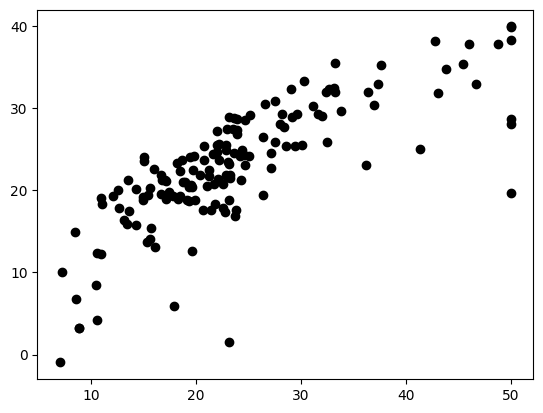

In [19]:
plt.scatter(y_test, y_pred, color='black')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
score=100-(mean_squared_error(y_test,y_pred))

In [22]:
score

60.70299212261764

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model=RandomForestRegressor()


In [25]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
y_pred1=model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [31]:
s1=mean_squared_error(y_test,y_pred1)/100
#lower the rmse the better the model we use one hot encoding to convert categorical to numerical data
# rmse =sqrt(mse)
print(s1)
import math
math.sqrt(s1)

0.2663081888157896


0.5160505680800959

In [32]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9565996524839999
0.727236781789457


In [ ]:
#Hyperparameter tuning
#1.GridSearchCV
#Main parameters used by RandomForest Algorithm are
#1> n_estimators ---> The number of trees in the forest.

#2> criterion--->{"mse", "mae"}-->The function to measure the quality of a split

3#> max_features--->{"auto", "sqrt", "log2"}--> The number of features to consider when looking for the best split: